## binarsity results visualisation

All calculations are processed on a HPC2 Cluster. Choose the `filename` to edit the corresponding results and save it as .html file.

In [1]:
# -*- coding: utf-8 -*-
%reset -f
%matplotlib inline
import os
import numpy as np
import pandas as pd
import seaborn.apionly as sns
import pylab as pl
from prettytable import PrettyTable
from sklearn.metrics import roc_auc_score, roc_curve
from mlpp.preprocessing import FeaturesBinarizer

## Visualize data

In [2]:
filename = 'hepmass_all'
os.chdir('./datasets/%s' % filename)
data_folder = os.path.expanduser("~/Dev/datasets_binarsity/")
# otherwise our dropbox is full
df = pd.read_csv(data_folder + "%s/%s" % (filename, filename))

# continuous features only
to_be_dropped = []
for i in range(df.shape[1]):
    feature_type = FeaturesBinarizer._detect_feature_type(df.ix[:,i])
    if feature_type == 'discrete':
        to_be_dropped.append(i)
df = df.drop(df.columns[to_be_dropped], axis=1)

print(df.shape)
df.head()

(5, 23)


,f0,f1,f2,f3,f4,f6,f7,f8,f10,f11,...,f16,f18,f19,f20,f22,f23,f24,f25,f26,mass
0,-0.346368,0.416306,0.999236,0.475342,0.427493,1.989833,0.344530,1.566297,2.269852,-1.300984,...,-0.404118,4.105282,0.267826,0.378718,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.001047,-1.038225,0.655748,0.459217,-0.695640,...,-1.500441,-1.178141,-0.877361,-1.483769,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.150495,1.423404,1.270098,-1.031239,1.912465,...,-0.298099,-1.199511,0.539020,-1.590629,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,1.011112,-1.040340,-0.541991,1.142262,0.551081,...,1.439072,0.463763,-0.006583,1.089122,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.595304,-1.238987,0.336844,-0.181512,-1.329374,...,-1.222800,-0.552837,-1.418494,-0.562982,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


### Convergence check (objective must be decreasing)

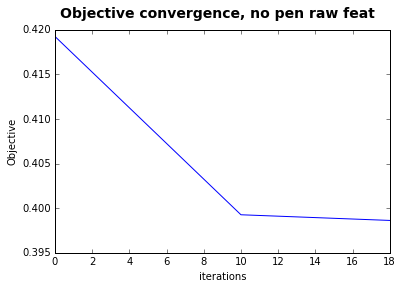

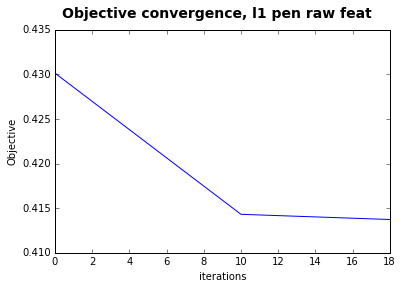

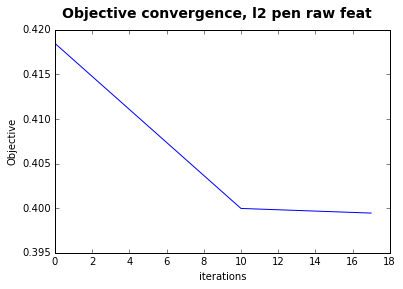

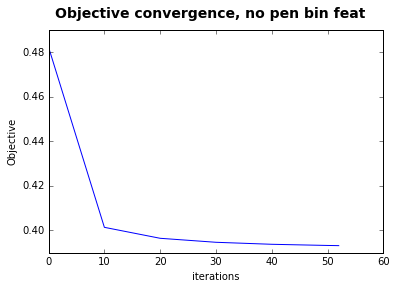

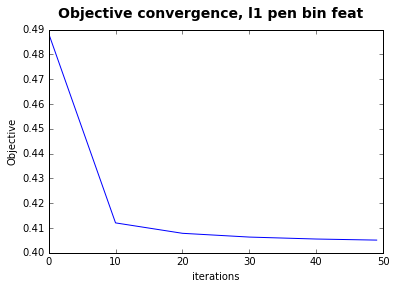

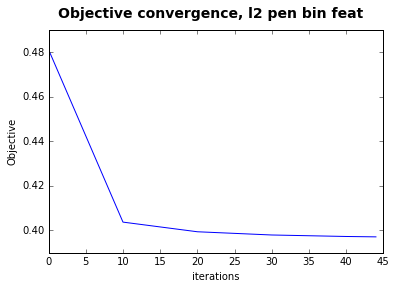

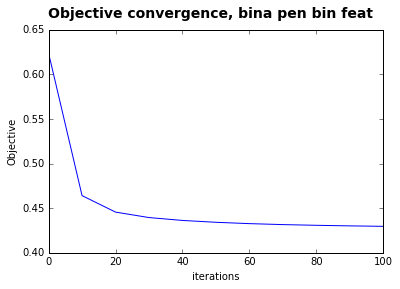

In [3]:
for fname in os.listdir('./results/cvg'):
    if fname[0] != '.':
        cvg = np.load('./results/cvg/' + str(fname))
        n_iter = cvg[:, 0]
        obj = cvg[:, 1]
        fname = fname.split('.')[0].split('-')[1].replace('_',' ')
        fig = pl.figure()
        pl.suptitle("Objective convergence, %s" % fname,
                    fontsize=14, fontweight='bold')
        pl.xlabel('iterations')
        pl.ylabel('Objective')
        pl.plot(n_iter, obj, '-b')
        pl.show()

### Beta coefficients

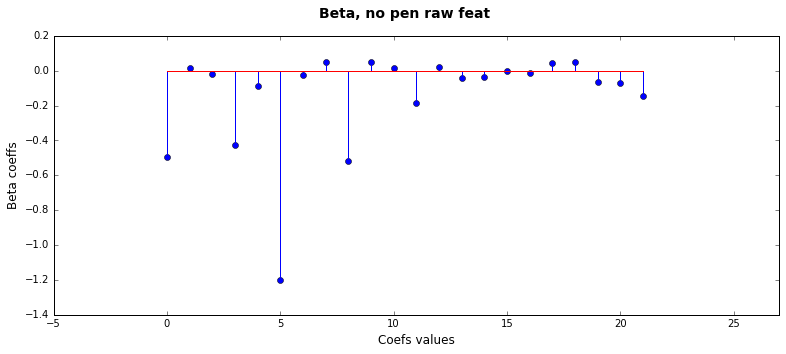

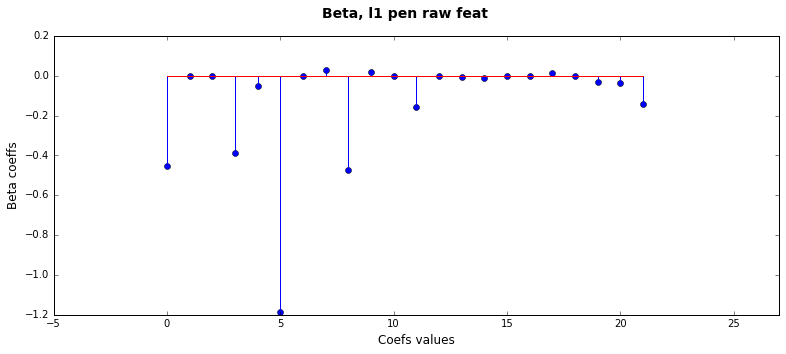

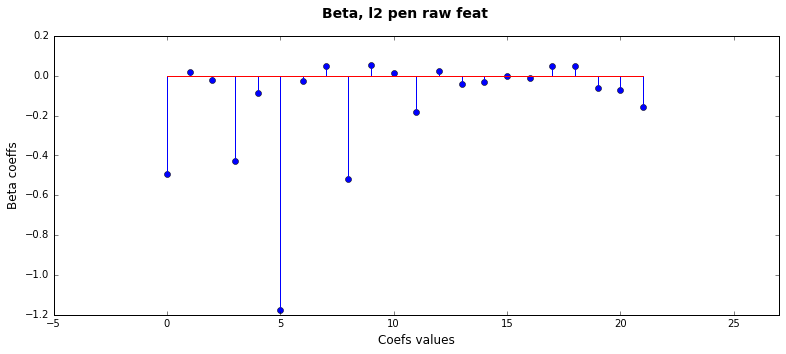

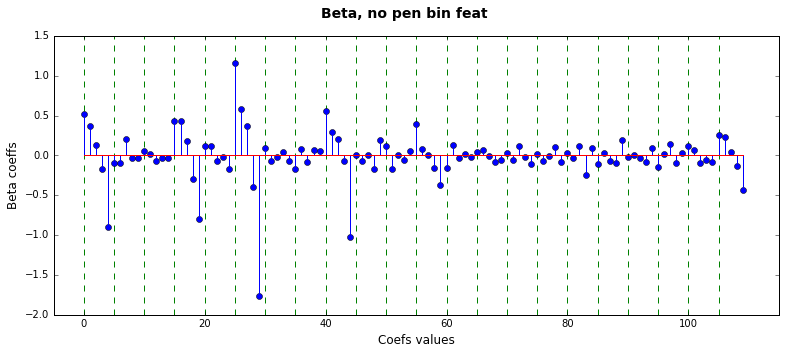

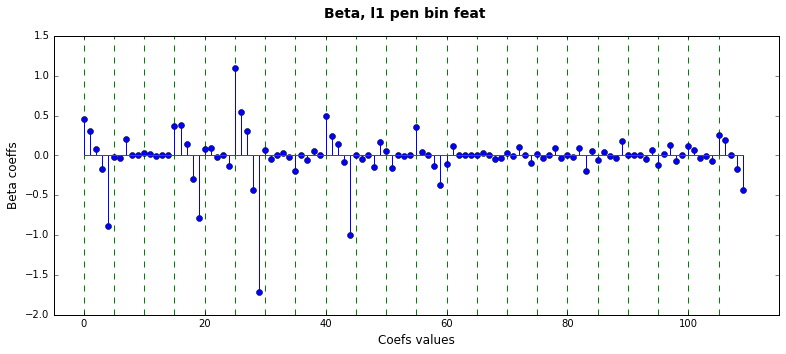

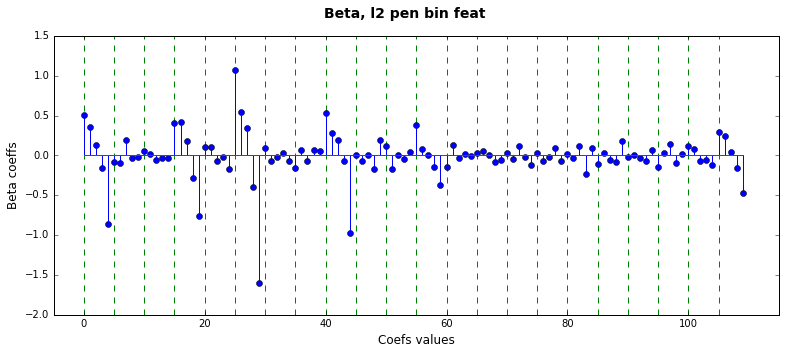

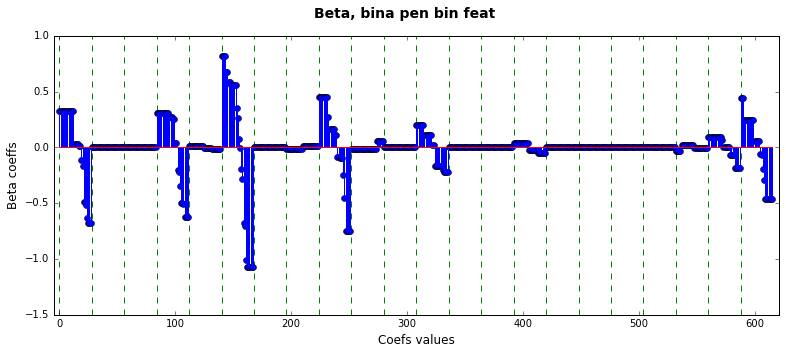

20 first selected features (bina pen bin feat):
+---------+-----------+
| Feature |   Effect  |
+---------+-----------+
|  f6#23  | 1.66133 % |
|  f6#24  | 1.66133 % |
|  f6#25  | 1.66133 % |
|  f6#26  | 1.66133 % |
|  f6#27  | 1.66133 % |
|  f6#28  | 1.66133 % |
|  f6#22  | 1.56851 % |
|   f6#2  | 1.27401 % |
|   f6#3  | 1.27401 % |
|   f6#4  | 1.27401 % |
|   f6#1  | 1.27401 % |
|  f10#24 | 1.16855 % |
|  f10#28 | 1.16855 % |
|  f10#27 | 1.16855 % |
|  f10#26 | 1.16855 % |
|  f10#25 | 1.16855 % |
|  f6#21  | 1.08658 % |
|  f0#26  | 1.04923 % |
|  f0#27  | 1.04923 % |
|  f0#28  | 1.04923 % |
|   f6#5  | 1.04735 % |
+---------+-----------+


In [4]:
for fname in os.listdir("./results/beta"):
    if fname[0] not in ['.', 'f', 'b']:
        coeffs = np.load("./results/beta/%s" % fname)
        model = fname.split('.')[0].split('-')[1]
        fig = pl.figure(figsize=(13,5))
        ax = fig.add_subplot(111)
        if(int(fname.split('-')[0]) > 2):
            blocks_start = np.load("./results/beta/blocks_start-%s.npy" % model)
            for val in blocks_start:
                ax.axvline(val, color='g', linestyle='--') 
        pl.suptitle("Beta, %s" % model.replace('_',' '), 
                    fontsize=14, fontweight="bold")
        pl.xlabel("Coefs values", fontsize=12)
        pl.ylabel("Beta coeffs", fontsize=12)
        ax.stem(coeffs)
        
        ax.set_xlim([-5, len(coeffs)+5])
        pl.show()

features_names = np.load("./results/beta/features_names_bina.npy")
nb_first_features = 20
idx_selected = [i for i, x in enumerate(coeffs != 0.) if x]
features_selected = [features_names[i] for i in  idx_selected]
norm1_coeff = np.linalg.norm(coeffs, ord=1)
val = [100 * abs(coeffs[i])/norm1_coeff for i in  idx_selected]
features_selected = pd.DataFrame({'Feature' : features_selected,
                                  'Effect' : val})
features_selected.sort_values(['Effect'], ascending=False, inplace=True)
features_selected.index = range(len(features_selected))
print("%s first selected features (bina pen bin feat):" % nb_first_features)
t = PrettyTable(['Feature', 'Effect']) 
for k,i in enumerate(range(len(features_selected))):
    if k<nb_first_features+1:
        t.add_row([features_selected.Feature[i], 
                   "%g %%" % features_selected.Effect[i]])
print(t)

### Learning curves

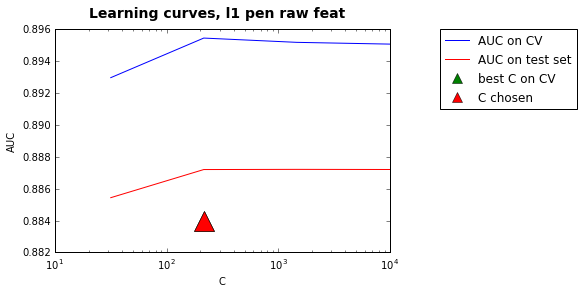

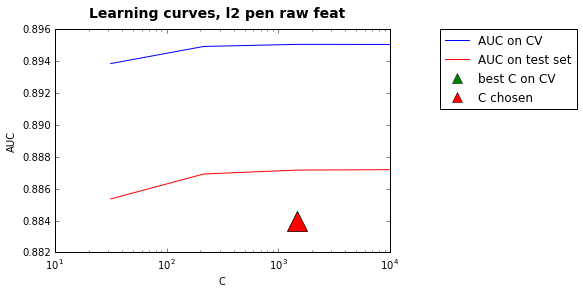

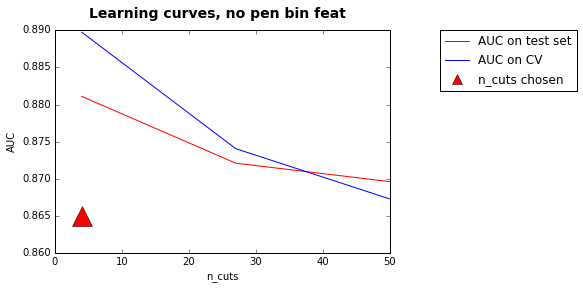

n_cuts_chosen=4.0
C_chosen=1467.79926762


ValueError: zero-size array to reduction operation minimum which has no identity

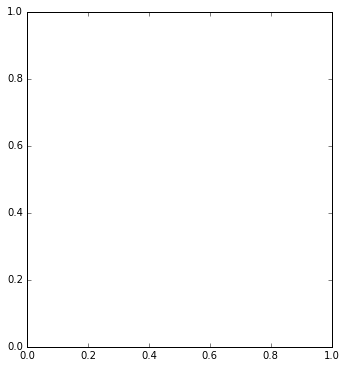

In [5]:
for fname in os.listdir("./results/learning_curves"):
    if fname[0] != '.':
        learning_curves = np.load("./results/learning_curves/" + str(fname))
        model_num = fname.split('-')[0]
        fname_ = fname.split('.')[0].split('-')[1].replace('_',' ')  
            
        if int(model_num) == 2:
            fig = pl.figure()
            ax = fig.add_subplot(111)
            C_grid = learning_curves[:, 0]
            C_grid_ = C_grid
            avg_scores = learning_curves[:, 1]
            score_test = learning_curves[:, 2]
            selection = fname.split('.')[0].split('selection_')[1]
            idx_best = np.unravel_index(avg_scores.argmax(), 
                                        avg_scores.shape)[0]
            C_best = C_grid[idx_best]
            if selection == 'min':
                C_chosen = C_best
            if selection == '1st':
                max_ = avg_scores.max()
                min_ = avg_scores.min()
                idx = [i for i, is_up in enumerate(
                    list(avg_scores >= max_ - .05 * (max_ - min_)))
                       if is_up]
                idx_chosen = min(idx) if len(idx) > 0 else idx_best
                C_chosen = C_grid[idx_chosen]
            
            pl.xscale('log')
            ax.plot(C_grid, avg_scores, label="AUC on CV")
            ax.plot(C_grid, score_test , '-r', 
                    label="AUC on test set")
            y_min = ax.get_ylim()[0]
            ax.plot(C_best,y_min,'g^',ms=20, label="best C on CV")
            ax.plot(C_chosen,y_min,'r^',ms=20, label="C chosen")
            pl.suptitle("Learning curves, %s" % fname_, 
                        fontsize=14, fontweight="bold")
            pl.xlabel("C")
            pl.ylabel("AUC")
            pl.legend(bbox_to_anchor=(1.15,1), loc=2, borderaxespad=0.,
                      numpoints=1, markerscale=.5)
            pl.show()
            
        if int(model_num) == 3:
            fig = pl.figure()
            ax = fig.add_subplot(111)
            n_cuts_grid = learning_curves[:, 0]
            avg_scores = learning_curves[:, 1]
            score_test = learning_curves[:, 2]
            idx_best = np.unravel_index(avg_scores.argmax(), 
                                        avg_scores.shape)[0]
            n_cuts_chosen = n_cuts_grid[idx_best]
            ax.plot(n_cuts_grid, score_test , '-r', 
                    label = "AUC on test set")
            ax.plot(n_cuts_grid, avg_scores, label="AUC on CV")
            y_min = ax.get_ylim()[0]
            ax.plot(n_cuts_chosen,y_min,'r^',ms=20, 
                    label="n_cuts chosen")
            pl.suptitle("Learning curves, %s" % fname_, 
                        fontsize=14, fontweight="bold")
            pl.xlabel('n_cuts')
            pl.ylabel('AUC')
            pl.legend(bbox_to_anchor=(1.15,1), loc=2, borderaxespad=0., 
                      numpoints=1, markerscale=.5)
            pl.show()
            
        if int(model_num) in [4, 5]:
            n_cuts_grid_size = int(learning_curves.shape[1]/2)
            avg_scores = learning_curves[:, :n_cuts_grid_size]
            score_test = learning_curves[:, n_cuts_grid_size:]
            fig = pl.figure(figsize=(12,6))
            
            id_C, id_n_cuts = np.where(avg_scores == avg_scores.max())
            C_chosen = C_grid[len(C_grid) - id_C[0] - 1]
            n_cuts_chosen = n_cuts_grid[id_n_cuts[0]]
            
            print("n_cuts_chosen=%s" % n_cuts_chosen)
            print("C_chosen=%s" % C_chosen)
            
            if True:
                lines2del = 5
                avg_scores = avg_scores[:-lines2del,:]
                score_test = score_test[:-lines2del,:]
                C_grid = C_grid_[lines2del:]
            
            
            
            for i,data in enumerate([avg_scores, score_test]):
                if i == 0:
                    add = 'CV'
                    ax = fig.add_subplot(121)
                else:
                    add = 'test set'
                    ax = fig.add_subplot(122)
                ax = sns.heatmap(data, cmap=pl.cm.Blues, linewidths=.1)
                pl.yticks(rotation=0)
                pl.title("Heatmap on %s, %s" % (add, fname_), 
                         fontsize=14, fontweight="bold")
                pl.xlabel('n_cuts')
                pl.ylabel('C', rotation=0)
                ax.set_xticklabels(n_cuts_grid, minor=False)
                ax.set_yticklabels(['%.1f' % C for C in C_grid], minor=False)
                ax.grid(False)
            pl.tight_layout()
            pl.show()            

## Final performances comparison

In [6]:
results = open("./results/results.txt", "r")
print(results.read())

+-------------------+----------+-------+
|       Algos       |   AUC    |  time |
+-------------------+----------+-------+
|  no pen raw feat  | 0.887202 | 0.237 |
|  l2 pen raw feat  | 0.887173 | 0.079 |
|  l1 pen raw feat  | 0.887205 | 0.084 |
|  no pen bin feat  | 0.881098 | 0.390 |
|  l1 pen bin feat  | 0.882898 | 0.381 |
|  l2 pen bin feat  | 0.881131 | 0.331 |
| bina pen bin feat | 0.889016 | 4.883 |
+-------------------+----------+-------+
 global time: 414.90979075431824 s


## ROC curves

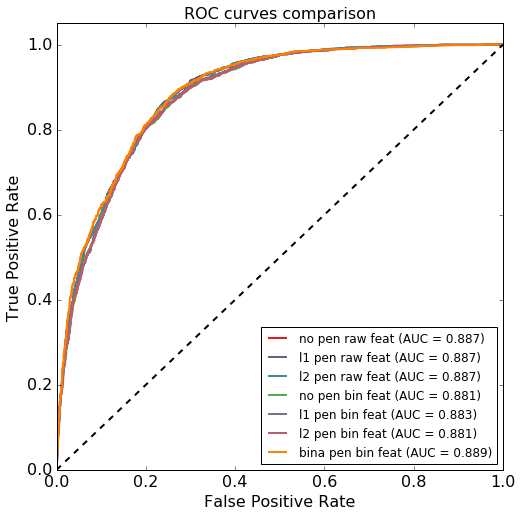

In [7]:
y_test = np.load('./results/y_test.npy')
lw = 2
color_list = pl.cm.Set1(np.linspace(0, .5, 7))
fig = pl.figure(figsize=(8,8))   
ax = fig.add_subplot(1,1,1)
i=0
for fname in os.listdir('./results/y_pred'):
    if fname[0] != '.':
        y_pred = np.load('./results/y_pred/' + str(fname))
        fname = fname.split('.')[0].split('-')[1].replace('_',' ')
        fpr, tpr, threshold = roc_curve(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        pl.plot(fpr, tpr, color=color_list[i], lw=lw, 
                label = '%s (AUC = %0.3f)' % (fname, roc_auc))
        i+=1

pl.plot([0, 1], [0, 1], 'k--', lw=lw)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.05])
pl.tick_params(axis='both', which='major', labelsize=16)
pl.xlabel('False Positive Rate', fontsize=16)
pl.ylabel('True Positive Rate', fontsize=16)
pl.title('ROC curves comparison', fontsize=16)
pl.legend(loc="lower right")
pl.savefig('./results/roc_curves.pdf', bbox_inches='tight')
pl.show()